# Import Packages

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Define Lyapunov Exponent

In [ ]:
def lyapunov_exponent(a, b, num_iterations=1000, discard=100):
    
    '''
    a, b = intial parameters
    num_interations = total number of iterations
    discard = number of interations to skip over (affected by transient behavior)
    '''
    
    epsilon = 1e-10 #small constant to avoid ln(0)
    max_val = 1e10   #threshold to prevent overflow
    
    x, y = 0, 0  # Initial conditions
    sum_ln = 0
    for i in range(num_iterations):
        x_next = 1 - a * x ** 2 + y
        y_next = b * x
        
        # prevent overflow by limiting x and y
        if abs(x_next) > max_val or abs(y_next) > max_val:
            return np.nan  # Indicate an overflow condition
        
        if i >= discard:  # Skip transient
            df_x = -2 * a * x #derivative of x_next
            ln_df_x = np.log(abs(df_x + epsilon)) #natural lof of x_next
            sum_ln += ln_df_x #definition of lyapunov exponent
            
        x, y = x_next, y_next
        
    return sum_ln / (num_iterations - discard)

# Plot Heat Map for Hénon Attractor

The Lyapunov Exponent is a quantity that characterizes the rate of separation of infinitesimally close trajectories, used to characterize chaos:

- Positive LE indicates chaotic behavior in that region
- Negative LE indicates periodic behavior in that region
- 0 indicates steady state behavior

A heat map will be able to display the distribution of different Lyapunov Exponent values when the system is given different ordered pairs of parameters (a,b)

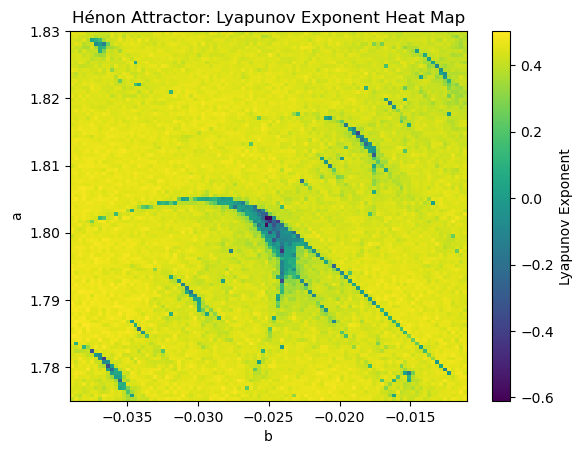

In [6]:
#range of a and b values to focus on
a_values = np.linspace(1.775, 1.830, 100) #example range of values
b_values = np.linspace(-0.039, -0.011, 100) #example range of values
lyapunov_map = np.zeros((len(a_values), len(b_values)))


# Lists to store parameters for each type of behavior
chaotic = []
periodic = []
intermittent = []  #potentially used for specific cases

# Generate values of Lyapunov exponent for different a, b
for i, a in enumerate(a_values):
    for j, b in enumerate(b_values):
        lyapunov_exp = lyapunov_exponent(a, b)
        lyapunov_map[i, j] = lyapunov_exp
        
        # Classify the behavior based on Lyapunov exponent
        if np.isnan(lyapunov_exp):
            continue  # Skip overflow cases
        elif lyapunov_exp > 0:
            chaotic.append((a, b))
        elif lyapunov_exp < 0:
            periodic.append((a, b))
        else:
            # Here we may classify as intermittent if needed
            intermittent.append((a, b))
            
# Print the classified ranges or values
'''print(f"Chaotic regions (a, b): {chaotic}")
print(' ')
print(f"Periodic regions (a, b): {periodic}")
print(' ')
print(f"Intermittent regions (a, b): {intermittent}")'''

# Plotting the heat map
plt.imshow(lyapunov_map, extent=(-0.039, -0.011, 1.775, 1.830), cmap='viridis', aspect='auto')
plt.colorbar(label='Lyapunov Exponent')
plt.xlabel('b')
plt.ylabel('a')
plt.title('Hénon Attractor: Lyapunov Exponent Heat Map')
plt.show()